## Reproduction of RQ2-3 (Figure 4, Table 6)

This notebook reproduces the values in Table 6 and Figure 4 (selection and ranking results presented in RQ2-3). 

In [1]:
import sys
sys.path.append("../../scripts/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from evaluate_util import *

RANKING_RESULT_PATH_D4J = '../../results/ranking_features_d4j.csv'
GEN_TEST_PATH = '../../data/Defects4J/gen_tests/'

with open(RANKING_RESULT_PATH_D4J) as f:
    rank_feature_df = pd.read_csv(f)

### Figure 4: selection accuracy for different thresholds

In [2]:
thresholds = range(0, 43)
max_df = rank_feature_df.groupby('bug_id').max()

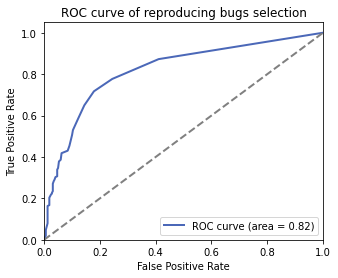

In [3]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(max_df.success.tolist(), list(map(lambda x: x/50, max_df.clus_size_output_fib.tolist())))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
lw = 2
plt.plot(
    fpr,
    tpr,
    color='#4B68B8',
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="grey", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of reproducing bugs selection")
plt.legend(loc="lower right")
plt.show()

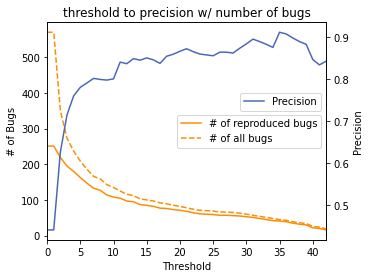

In [4]:
rows = []

for th in thresholds:
    selected_df = max_df[max_df.clus_size_output_fib >= th].reset_index()
    precision = len(selected_df[selected_df.success]) / len(selected_df)
    rows.append({
        'threshold': th,
        'precision': precision,
        'num_bugs': len(selected_df),
        'num_success_bugs': len(selected_df[selected_df.success])
    })

stat_df = pd.DataFrame(rows)
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()
p1 = sns.lineplot(data=stat_df['num_success_bugs'], color='darkorange', ax=ax1, legend='brief')
p1 = sns.lineplot(data=stat_df['num_bugs'], color='darkorange', ax=ax1, linestyle='--', legend='brief')
p2 = sns.lineplot(data=stat_df['precision'], color='#4B68B8', ax=ax2, legend='brief')

ax1.set_xlabel('Threshold')
ax1.set_ylabel('# of Bugs')
ax2.set_ylabel('Precision')
# p1.set_title("Threshold to Number of Has-BRT Bugs and Precision")
ax1.set_xlim(0,42)
ax2.set_xlim(0,42)
ax1.set_title('threshold to precision w/ number of bugs')
# ax1.legend(['# of reproduced bugs', '# of all bugs'], loc='upper left', bbox_to_anchor=(1.1, 0.9))
ax1.legend(['# of reproduced bugs', '# of all bugs'], loc='center right')
ax2.legend(['Precision'], loc= 'upper right', bbox_to_anchor=(1.0, 0.7))

plt.show()

In [5]:
THR = 1
df = max_df[max_df.clus_size_output_fib <= THR]
selected_df = max_df[max_df.clus_size_output_fib > THR].reset_index()

print(f'[Threshold = {THR}]')
print("# precision: ", len(selected_df[selected_df.success]) / len(selected_df))
print("# recall: ", len(selected_df[selected_df.success]) / (len(selected_df[selected_df.success]) + len(df[df.success])))
print("# accuracy: ", (len(selected_df[selected_df.success]) + len(df[~df.success]))/ (len(max_df)))
print("Reduction rate: ", len(max_df), '=>', len(selected_df), ', ', str(round(len(selected_df)/len(max_df)*100, 2)) + '%')

[Threshold = 1]
# precision:  0.6257142857142857
# recall:  0.8725099601593626
# accuracy:  0.7140350877192982
Reduction rate:  570 => 350 ,  61.4%


### Table 6: ranking result on selected data 
* max_output_clus_size threshold=1

#### Defects4J Ranking Result

In [8]:
with open('../../results/ranking_d4j_selected_th1.csv') as f:
    rank_df = pd.read_csv(f)

evaluate_ranking(rank_df)

{'wef@1_sum': 201,
 'wef@1_mean': 0.5742857142857143,
 'acc@1': 149,
 'wef@3_sum': 539,
 'wef@3_mean': 1.54,
 'acc@3': 184,
 'wef@5_sum': 797,
 'wef@5_mean': 2.277142857142857,
 'acc@5': 199}

Aggregated result from random baseline (100 runs)

In [9]:
with open('../../results/ranking_random_baseline_d4j.json') as f:
    baseline_result = json.load(f)

mean = lambda l: sum(l)/len(l)

for N in [1, 3, 5]:
    wasted_effort_results = baseline_result[str(N)]['wefs']
    acc_results = baseline_result[str(N)]['acc']
    sum_result = mean([v[0] for v in wasted_effort_results])
    mean_result = mean([v[1] for v in wasted_effort_results])
    print('wef_sum@{}'.format(N), round(sum_result, 2))
    print('wef_mean@{}'.format(N), round(mean_result, 2))
    print('acc@{} : {}'.format(N, mean(acc_results)))

wef_sum@1 233.77
wef_mean@1 0.67
acc@1 : 116.23
wef_sum@3 599.37
wef_mean@3 1.71
acc@3 : 172.4
wef_sum@5 874.48
wef_mean@5 2.5
acc@5 : 191.99


#### GHRB Ranking Result

In [10]:
with open('../../results/ranking_ghrb_selected_th1.csv') as f:
    rank_df = pd.read_csv(f)

evaluate_ranking(rank_df)

{'wef@1_sum': 15,
 'wef@1_mean': 0.7142857142857143,
 'acc@1': 6,
 'wef@3_sum': 42,
 'wef@3_mean': 2.0,
 'acc@3': 7,
 'wef@5_sum': 60,
 'wef@5_mean': 2.857142857142857,
 'acc@5': 8}

In [11]:
with open('../../results/ranking_random_baseline_ghrb.json') as f:
    baseline_result = json.load(f)

mean = lambda l: sum(l)/len(l)

for N in [1, 3, 5]:
    wasted_effort_results = baseline_result[str(N)]['wefs']
    acc_results = baseline_result[str(N)]['acc']
    sum_result = mean([v[0] for v in wasted_effort_results])
    mean_result = mean([v[1] for v in wasted_effort_results])
    print('wef_sum@{}'.format(N), round(sum_result, 2))
    print('wef_mean@{}'.format(N), round(mean_result, 2))
    print('acc@{} : {}'.format(N, mean(acc_results)))

wef_sum@1 16.24
wef_mean@1 0.77
acc@1 : 4.76
wef_sum@3 44.56
wef_mean@3 2.12
acc@3 : 6.6
wef_sum@5 64.3
wef_mean@5 3.06
acc@5 : 7.28
